# Regresión lineal con **statsmodel**

Realizaremos el mismo ejemplo pero utilizando ahora la biblioteca **statsmodel**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.regression.linear_model as lm
import matplotlib.pyplot as plt
import scipy.stats as ss
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns

# seabron style
sns.set()

np.random.seed(9876789)

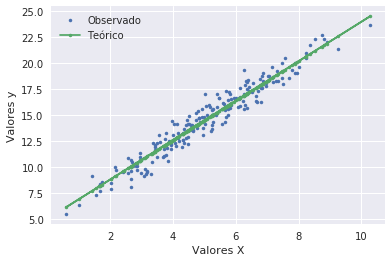

In [2]:
# datos sintéticos
X = 5 + 1.8 * np.random.randn(200)
res = 0.9 * np.random.randn(200)
y_obs = 5 + 1.9 * X + res
y_th = 5 + 1.9 * X

# visualizamos
plt.plot(X,y_obs, marker='.', linestyle='none', label='Observado')
plt.plot(X,y_th, marker='.', linestyle='-', label='Teórico')
plt.legend()
plt.xlabel("Valores X")
plt.ylabel("Valores y")
plt.show()

In [3]:
# Añadimos el parámetro de intercepción
X = sm.add_constant(X)

Fit and summary:

In [4]:
model = sm.OLS(y_obs, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     3188.
Date:                Tue, 10 Jul 2018   Prob (F-statistic):          4.93e-124
Time:                        13:32:54   Log-Likelihood:                -254.77
No. Observations:                 200   AIC:                             513.5
Df Residuals:                     198   BIC:                             520.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8298      0.183     26.390      0.0

Quantities of interest can be extracted directly from the fitted model. Type dir(results) for a full list. Here are some examples:

In [5]:
print('Parameters: ', results.params)
print("P-value: ",results.pvalues)
print('R2: ', results.rsquared)

Parameters:  [4.82976965 1.9331426 ]
P-value:  [9.38996043e-067 4.93447333e-124]
R2:  0.9415288345876829


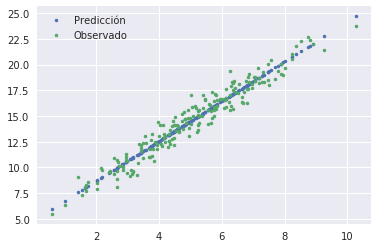

In [6]:
# Predicción del modelo
y_pred = results.predict(exog=X)

# Visualizamos
plt.plot(X[:,1], y_pred, marker='.', linestyle='none', label='Predicción')
plt.plot(X[:,1], y_obs, marker='.', linestyle='none', label='Observado')
plt.legend()
plt.show()

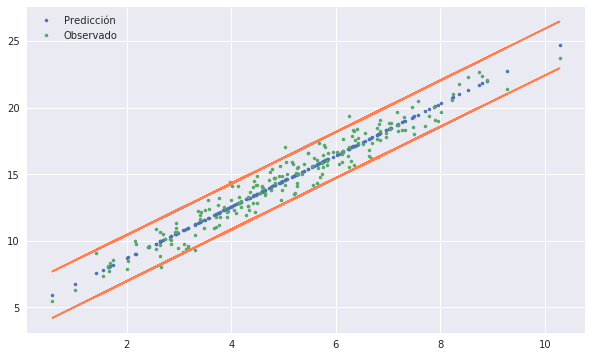

In [7]:
# desviación
prstd, iv_l, iv_u = wls_prediction_std(results)

# visualizamos
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(X[:,1], results.fittedvalues, marker='.', linestyle='none', label='Predicción')
ax.plot(X[:,1], y_obs, marker='.', linestyle='none', label='Observado')
ax.plot(X[:,1], iv_u, color='coral')
ax.plot(X[:,1], iv_l, color='coral')
ax.legend(loc='best');

## Distribución de los errores

* SST = SSD + SSR
* SST (sum squared total): Variabilidad de los datos con respecto de su media
* SSD (sum squared differences) : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR (sum squared residuals): Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [8]:
# SSR
ssr = (y_pred - np.mean(y_obs)) ** 2
# SSD
ssd = (y_pred - y_obs)
# SST
sst = (y_obs - np.mean(y_obs)) ** 2 

# coeficiente r2
print("R2: ",ssr.sum() / sst.sum())
print("SSR: Sum squared residuals: ", ssr.sum())
print("MSR: Mean squared residuals: ", ssr.sum() / len(ssr))
print("SSD: Sum squared differences: ", np.sum(ssd**2))
print("MSD: Mean squared differences: ", np.mean(ssd**2))
print("SST: Sum squared total: ", sst.sum())
print("MST: Mean squared total: ", sst.sum()/len(sst))

R2:  0.9415288345876833
SSR: Sum squared residuals:  2409.2723816577904
MSR: Mean squared residuals:  12.046361908288953
SSD: Sum squared differences:  149.62150788821174
MSD: Mean squared differences:  0.7481075394410587
SST: Sum squared total:  2558.893889546001
MST: Mean squared total:  12.794469447730005


In [9]:
RSE = np.sqrt(np.sum(ssd**2) / (len(X) - 2))
MSE = np.mean(ssd**2) / (len(X) - 2)
print("RSE: ", RSE)
print("MSE: ", MSE)

RSE:  0.8692894691951552
MSE:  0.003778320906267973


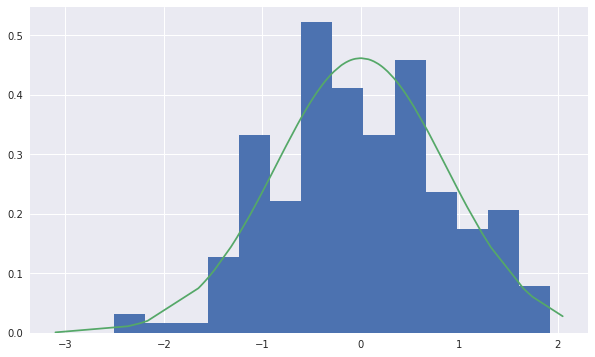

In [10]:
# ssd normal teórico
mean = np.mean(ssd)
std = np.std(ssd)

# distribución de datos teóricos
ssd_th = np.sort(mean + std * np.random.randn(100))
freq_th = ss.norm.pdf(x=ssd_th, loc=mean, scale=std)

plt.figure(figsize=(10,6))
plt.hist(ssd, bins=int(np.sqrt(len(ssd))), density=True)
plt.plot(ssd_th, freq_th)
plt.show()